Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load and inspect the data

In [4]:
df1 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df2 = pd.read_csv("Unemployment in India.csv")


Clean column names

In [6]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

Parse Dates

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

In [9]:
df1['Month_Year'] = df1['Date'].dt.to_period('M')
df2['Month_Year'] = df2['Date'].dt.to_period('M')

Check for Nulls

In [11]:
print("Nulls in df1:\n", df1.isnull().sum())
print("Nulls in df2:\n", df2.isnull().sum())

Nulls in df1:
 Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
Month_Year                                 0
dtype: int64
Nulls in df2:
 Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
Month_Year                                 28
dtype: int64


Plot Unemployment Rate Trend (National Average)

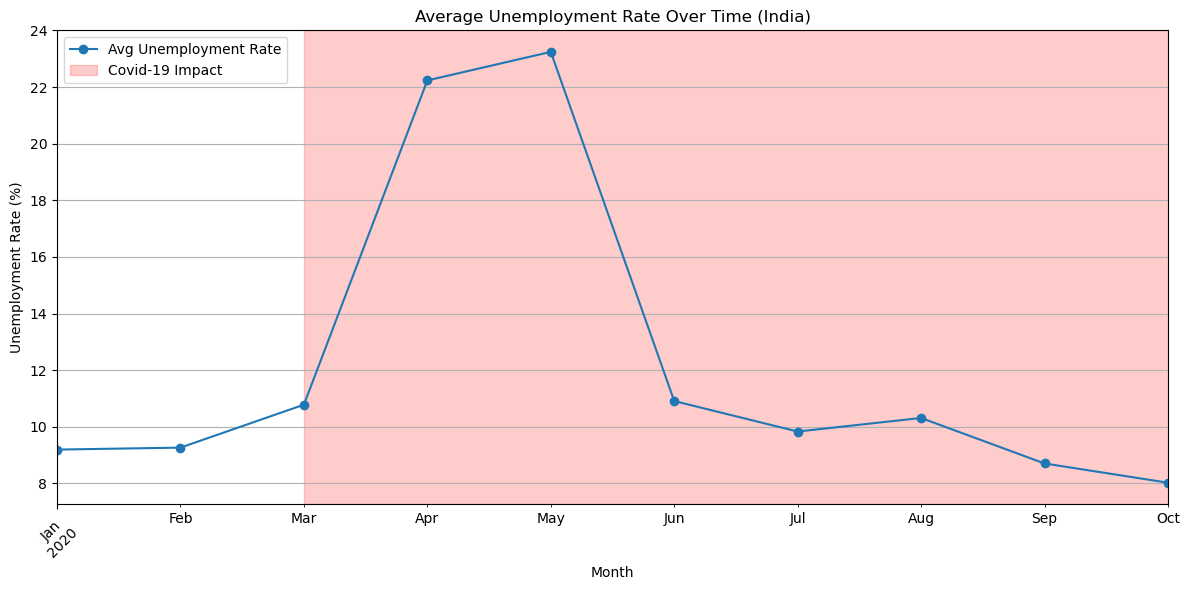

In [13]:
plt.figure(figsize=(12, 6))
df1_grouped = df1.groupby('Month_Year')['Estimated Unemployment Rate (%)'].mean()
df1_grouped.plot(marker='o', label='Avg Unemployment Rate')
plt.axvspan('2020-03', '2020-12', color='red', alpha=0.2, label='Covid-19 Impact')
plt.title('Average Unemployment Rate Over Time (India)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Region-wise Unemployment Analysis During Covid-19

C:\Users\Hp\AppData\Local\Temp\ipykernel_11788\2980171434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_covid.values, y=region_covid.index, palette='coolwarm')


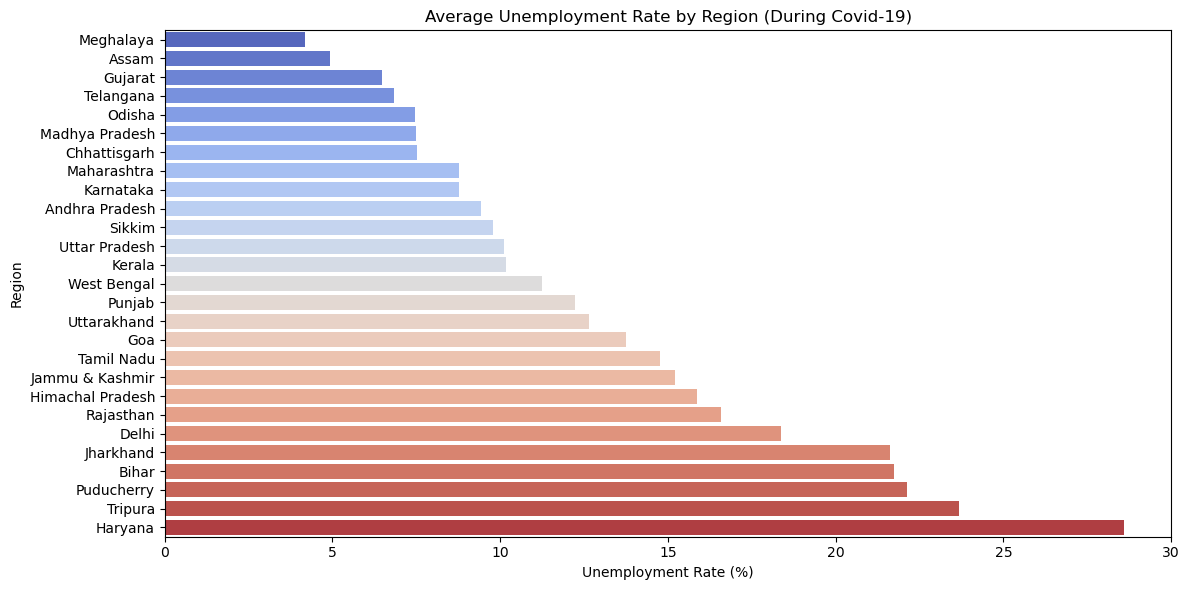

In [15]:
covid_df = df1[(df1['Date'] >= '2020-03-01') & (df1['Date'] <= '2020-12-31')]
region_covid = covid_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=region_covid.values, y=region_covid.index, palette='coolwarm')
plt.title('Average Unemployment Rate by Region (During Covid-19)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


Seasonal Pattern Check

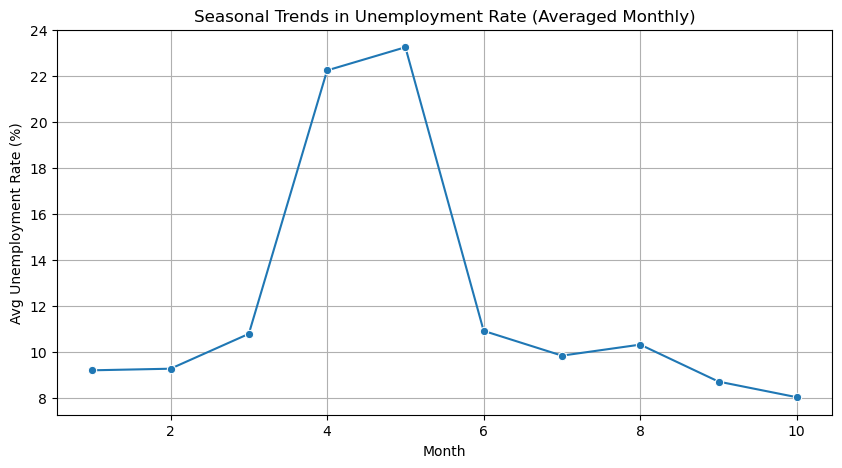

In [17]:
df1['Month'] = df1['Date'].dt.month
monthly_trend = df1.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
plt.title('Seasonal Trends in Unemployment Rate (Averaged Monthly)')
plt.xlabel('Month')
plt.ylabel('Avg Unemployment Rate (%)')
plt.grid(True)
plt.show()

Region vs Labour Participation Rate

C:\Users\Hp\AppData\Local\Temp\ipykernel_11788\1782920328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_lpr.index, y=region_lpr.values, palette='viridis')


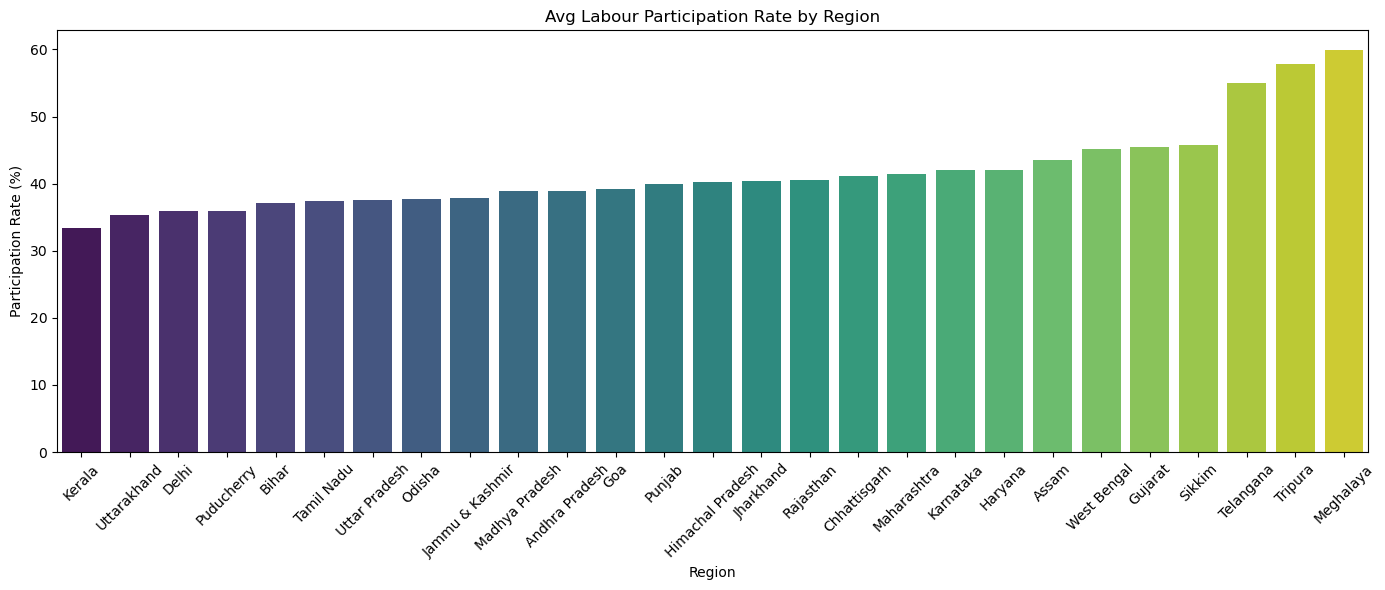

In [19]:
plt.figure(figsize=(14, 6))
region_lpr = df1.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().sort_values()
sns.barplot(x=region_lpr.index, y=region_lpr.values, palette='viridis')
plt.title('Avg Labour Participation Rate by Region')
plt.ylabel('Participation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights for Economic/Social Policy

In [21]:

print("\n--- Key Insights ---")
print("1. Unemployment spiked sharply after March 2020 across all states, confirming Covid-19's impact.")
print("2. States like Haryana, Rajasthan, and Jharkhand showed particularly high unemployment during lockdown.")
print("3. Labour participation dropped during Covid-19—indicating withdrawal from job markets.")
print("4. Some seasonal patterns show slight peaks mid-year (April-July), possibly linked to agriculture.")
print("5. Policies should focus on job security during pandemics and support sectors vulnerable to lockdowns.")


--- Key Insights ---
1. Unemployment spiked sharply after March 2020 across all states, confirming Covid-19's impact.
2. States like Haryana, Rajasthan, and Jharkhand showed particularly high unemployment during lockdown.
3. Labour participation dropped during Covid-19—indicating withdrawal from job markets.
4. Some seasonal patterns show slight peaks mid-year (April-July), possibly linked to agriculture.
5. Policies should focus on job security during pandemics and support sectors vulnerable to lockdowns.
